# _Music Recommendation Model_

#### Jake Fox
#### 4/5/2023

This dataset comes from Kaggle. A user has uploaded a dataset containing information about different songs the user either liked or disliked.

At the end of this project, I will have created a model that can be fed new song information based off the predictors I choose that will make a prediction of whether or not this specific user will like a song or not.

## Reading in the data and getting an overall view:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\data.csv")

df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [3]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


## Looking for null values and duplicates:

In [4]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [5]:
duplicates = df.duplicated().sum()
duplicates

0

# Standardizing the dataset:

In [6]:
y = df["liked"]
X = df.drop("liked", axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = X.columns
scaler = StandardScaler()

X[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])

# Detecting Outliers:

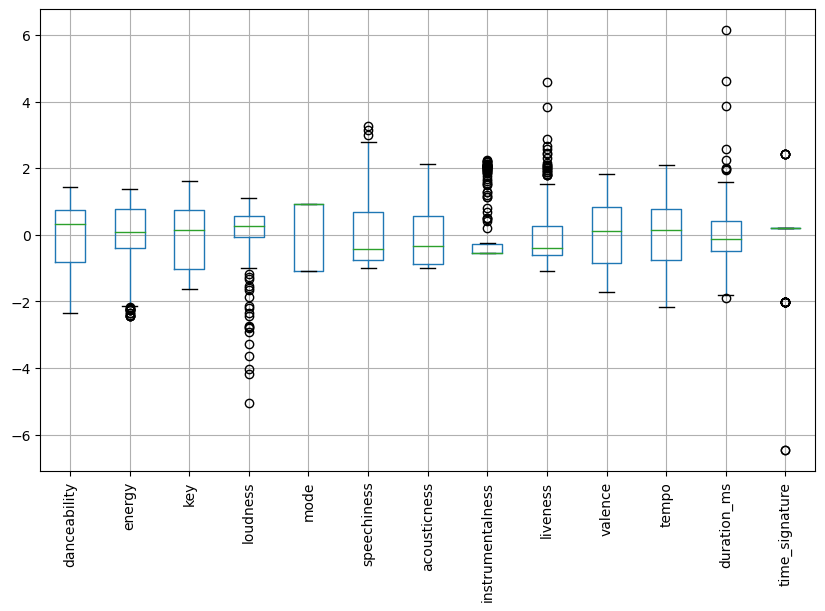

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
X.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()

In [9]:
# calculating mean and standard deviation of loudness
loudness_mean = X['loudness'].mean()
loudness_std = X['loudness'].std()

# defining outlier criteria
lower_bound = loudness_mean - 2 * loudness_std
upper_bound = loudness_mean + 2 * loudness_std

In [10]:
outliers_loudness = X[(X['loudness'] < lower_bound) | (X['loudness'] > upper_bound)]

In [11]:
outliers_loudness

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658
35,-1.525779,-2.262406,-0.439590,-2.921081,-1.080123,-0.970467,1.215493,1.270245,2.568952,-1.271992,0.248809,-1.221056,0.193658
48,-1.710914,-2.451668,-1.320274,-5.036523,-1.080123,-0.798117,2.112486,2.040507,-0.513284,-0.848784,-1.772701,2.561781,0.193658
58,-1.261960,-2.430121,0.734657,-3.627406,0.925820,-0.911352,2.059354,2.031820,-0.373268,-1.596327,-0.708970,0.037296,0.193658
62,-1.474866,-2.216921,0.147533,-2.210607,0.925820,-0.818100,2.103110,1.965218,-0.618296,-1.704938,0.299144,-0.198367,-2.027708
129,-1.960847,-2.208055,0.441095,-2.355191,0.925820,-0.851404,2.103110,2.248999,-0.743175,-1.704938,-2.001347,-0.879039,-2.027708
135,-1.882165,-2.273199,-0.146028,-2.795396,0.925820,-0.897197,2.084357,2.179501,-0.762096,-1.470488,0.490949,-0.135519,2.415023
138,-1.400812,-2.432703,-0.439590,-3.292144,-1.080123,-0.944656,2.099984,2.199772,-0.488687,-1.487716,-2.174554,0.397099,0.193658
142,-1.132365,-2.254311,-0.439590,-2.138392,0.925820,-0.764813,2.112486,1.953635,-0.640055,-1.692579,-1.777770,0.292607,0.193658
158,-1.243447,-2.446927,-1.320274,-4.191145,0.925820,-0.948819,2.106235,2.112900,-0.108374,-1.530412,-1.846417,0.564022,-2.027708


In [12]:
inst_mean = X['instrumentalness'].mean()
inst_std = X['instrumentalness'].std()

lower_bound = inst_mean - 2 * inst_std
upper_bound = inst_mean + 2 * inst_std

In [13]:
outliers_inst = X[(X['instrumentalness'] < lower_bound) | (X['instrumentalness'] > upper_bound)]

In [14]:
outliers_inst

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658
12,-1.572063,1.289639,-1.320274,0.764655,0.925820,0.017007,-0.992733,2.101317,-0.089453,-0.972375,-0.654316,-0.595952,0.193658
37,-0.873176,1.278075,-1.320274,0.811979,0.925820,-0.365993,-0.995959,2.083943,2.152690,-0.421830,-0.066797,-1.244025,0.193658
40,-1.289731,1.305057,0.734657,0.200148,-1.080123,-0.634926,-0.997041,2.118691,-0.430031,-0.167155,0.592403,-0.267468,0.193658
44,-2.095071,1.293494,0.734657,0.498535,-1.080123,-0.357667,-0.997224,2.008654,0.875520,-0.612835,-0.975099,0.611127,-2.027708
45,-1.220305,1.316621,-1.320274,0.686140,-1.080123,-0.224450,-0.996300,2.066568,-0.411110,-0.575383,-0.847478,-0.020314,0.193658
48,-1.710914,-2.451668,-1.320274,-5.036523,-1.080123,-0.798117,2.112486,2.040507,-0.513284,-0.848784,-1.772701,2.561781,0.193658
58,-1.261960,-2.430121,0.734657,-3.627406,0.925820,-0.911352,2.059354,2.031820,-0.373268,-1.596327,-0.708970,0.037296,0.193658
83,0.297807,-1.146489,-1.320274,-0.426894,-1.080123,-0.892202,0.562283,2.057881,1.991861,-1.238285,-0.555932,-0.860142,-2.027708
86,-1.729428,-1.682283,-1.320274,-1.260748,0.925820,-0.900528,2.078106,2.063673,-0.562479,-1.399329,-1.771487,4.617913,0.193658


In [15]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.047595e-16,1.608400e-17,-3.188333e-17,1.947160e-16,2.732857e-17,-3.501473e-17,-4.554761e-18,5.864255e-17,1.594166e-16,2.078110e-16,-5.465713e-17,1.514458e-16,2.655995e-16
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-2.345004e+00,-2.451668e+00,-1.613836e+00,-5.036523e+00,-1.080123e+00,-1.008767e+00,-9.972870e-01,-5.569551e-01,-1.091322e+00,-1.716549e+00,-2.174554e+00,-1.892613e+00,-6.470440e+00
25%,-8.060639e-01,-4.044724e-01,-1.026713e+00,-7.380833e-02,-1.080123e+00,-7.673104e-01,-8.654043e-01,-5.569551e-01,-6.097813e-01,-8.412931e-01,-7.440967e-01,-4.878397e-01,1.936575e-01
50%,3.163208e-01,7.928408e-02,1.475335e-01,2.636052e-01,9.258201e-01,-4.392628e-01,-3.315843e-01,-5.569331e-01,-4.111104e-01,1.174805e-01,1.360034e-01,-1.307393e-01,1.936575e-01
75%,7.513895e-01,7.673361e-01,7.346565e-01,5.612237e-01,9.258201e-01,6.789301e-01,5.779098e-01,-2.746223e-01,2.700468e-01,8.384333e-01,7.630220e-01,4.024693e-01,1.936575e-01
max,1.431763e+00,1.378296e+00,1.615341e+00,1.097920e+00,9.258201e-01,3.255853e+00,2.112486e+00,2.248999e+00,4.584043e+00,1.821551e+00,2.104395e+00,6.138969e+00,2.415023e+00


### *** The outliers do not seem to be input error, and based off general knowledge, I do not believe these should be omitted from the dataset, especially because the sample size isn't very big to begin with.

# Choosing the model and finding best predictors:

### Because our target variable is binary, I will be building a logisitic regression model.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# getting the coefficients
coef_df = pd.DataFrame({"predictor": X_train.columns, "coefficient": logreg.coef_[0]})

# sorting the coefficients by absolute value
coef_df["abs_coefficient"] = abs(coef_df["coefficient"])
coef_df = coef_df.sort_values(by="abs_coefficient", ascending=False)

print(coef_df.head(10))

           predictor  coefficient  abs_coefficient
3           loudness     1.758397         1.758397
11       duration_ms    -1.703450         1.703450
5        speechiness     1.584338         1.584338
7   instrumentalness    -1.374062         1.374062
0       danceability     0.963950         0.963950
10             tempo     0.589836         0.589836
4               mode    -0.396778         0.396778
12    time_signature     0.338124         0.338124
1             energy    -0.320065         0.320065
2                key     0.128045         0.128045


### *** We can see here that the best predictors of 'liked' are loudness, duration, speechiness, instrumentalness, and danceability. Before we commit to using all of these, let's check for multicollinearity:

In [19]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


### *** To reduce multicollinearity, we won't use danceability. It is highly correlated with instrumentalness and has a lesser coefficient in predicting liked:

In [20]:
loud_df = df['loudness'].groupby(df['liked'])

mean_loud = loud_df.mean()

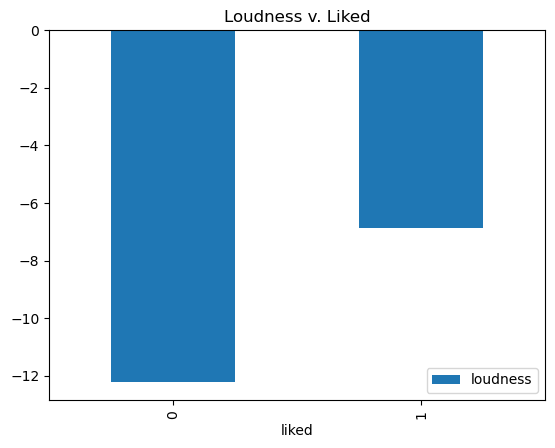

In [21]:
mean_loud.plot(kind='bar')

plt.title('Loudness v. Liked')
plt.legend()
plt.show()

### *** We can see here that the user prefers songs that are louder compared to quieter ones. The average loudness for songs liked is higher than the ones not liked by a noticeable amount.

In [22]:
dur_df = df['duration_ms'].groupby(df['liked'])

mean_dur = dur_df.mean()

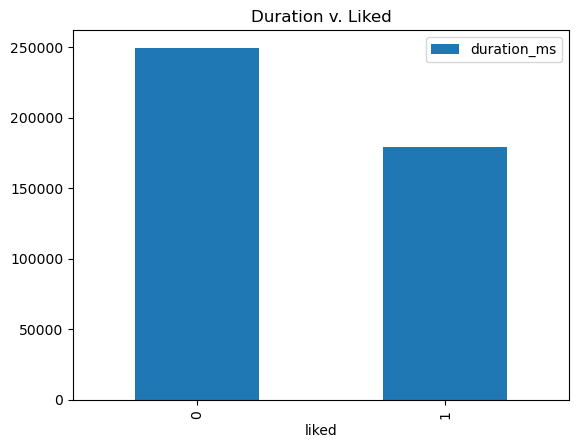

In [23]:
mean_dur.plot(kind='bar')

plt.title('Duration v. Liked')
plt.legend()
plt.show()

### *** We can see here that the user prefers shorter songs compared to longer ones.

In [24]:
speech_df = df['speechiness'].groupby(df['liked'])

mean_speech = speech_df.mean()

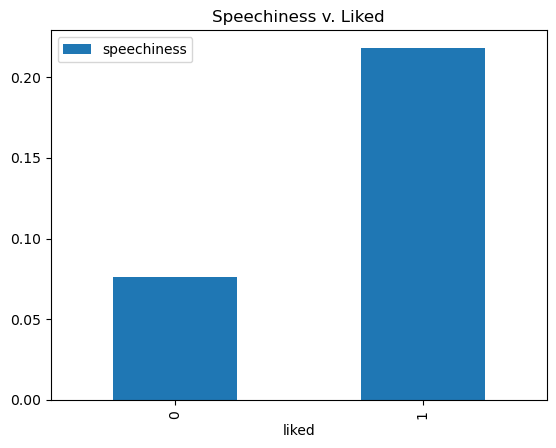

In [25]:
mean_speech.plot(kind='bar')

plt.title('Speechiness v. Liked')
plt.legend()
plt.show()

### *** We can see here that the user prefers songs with more speechiness compared to ones with less.

In [26]:
inst_df = df['instrumentalness'].groupby(df['liked'])

mean_inst = inst_df.mean()

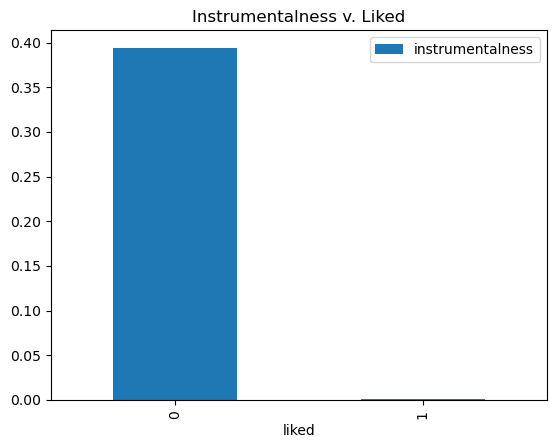

In [27]:
mean_inst.plot(kind='bar')

plt.title('Instrumentalness v. Liked')
plt.legend()
plt.show()

### *** We can see here that the user heavily prefers songs with lower instrumentalness.

# Fitting the model and observing the performance:

In [28]:
top_predictors = coef_df["predictor"].head(4).tolist()

In [29]:
top_predictors

['loudness', 'duration_ms', 'speechiness', 'instrumentalness']

In [30]:
X_train_top = X_train[top_predictors]
X_test_top = X_test[top_predictors]

In [31]:
logreg_top = LogisticRegression()
logreg_top.fit(X_train_top, y_train)

LogisticRegression()

In [32]:
y_pred_top = logreg_top.predict(X_test_top)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_top))
print(classification_report(y_test, y_pred_top))

[[17  2]
 [ 2 18]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.90      0.90      0.90        20

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



### *** The results here are pretty good. We only falsely predicted 2 songs in each liked and disliked. The confidence of predicting both liked and disliked songs is around 90%.

## _Let's check for overfit:_

In [34]:
train_score = logreg_top.score(X_train_top, y_train)
test_score = logreg_top.score(X_test_top, y_test)

In [35]:
score_diff = train_score - test_score

if score_diff > 0.1:
    print("The model is overfitting.")
elif 0 <= score_diff <= 0.1:
    print("The model may be slightly overfitting.")
else:
    print("The model is not overfitting.")

The model may be slightly overfitting.


In [36]:
print('Train Score:', train_score)
print('Test Score:', test_score)

Train Score: 0.9423076923076923
Test Score: 0.8974358974358975


## *** The scores are good, but...

#### We can see from the training and test scores that the model could be slightly overfit. Looking back at the correlations, I see that loudness and instrumentalness have an absolute correlation higher than .5.

### Let's take out instrumentalness of the model to reduce multicollinearity and see what happens:

In [37]:
top_predictors = coef_df["predictor"].head(3).tolist()

In [38]:
top_predictors

['loudness', 'duration_ms', 'speechiness']

In [39]:
X_train_top = X_train[top_predictors]
X_test_top = X_test[top_predictors]

In [40]:
logreg_top = LogisticRegression()
logreg_top.fit(X_train_top, y_train)

LogisticRegression()

In [41]:
y_pred_top = logreg_top.predict(X_test_top)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_top))
print(classification_report(y_test, y_pred_top))

[[17  2]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.89      0.85      0.87        20

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



In [43]:
train_score = logreg_top.score(X_train_top, y_train)
test_score = logreg_top.score(X_test_top, y_test)

In [44]:
score_diff = train_score - test_score

if score_diff > 0.1:
    print("The model is overfitting.")
elif 0 <= score_diff <= 0.1:
    print("The model may be slightly overfitting.")
else:
    print("The model is not overfitting.")

The model is not overfitting.


In [45]:
print('Train Score:', train_score)
print('Test Score:', test_score)

Train Score: 0.8461538461538461
Test Score: 0.8717948717948718


### *** Comparing the two models, we are going to choose the second one. Because the testing set performed better than the training set, we can say it may be a more robust and generalizable model.

### *** Also, the testing scores are quite similar, with model 2 only having only about a .2 less of a difference.

## Now, my goal is to input data of my own for each predictor to see if the user will like the song based off the data provided. 

## I will also be observing the confidence level in the predictions to see how strongly the model is working.

In [46]:
X.head(15)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.769903,-0.055628,0.441095,0.417562,-1.080123,-0.843078,0.412263,-0.554830,-0.458413,0.503237,-0.896670,1.266065,0.193658
1,0.580139,0.248888,1.321780,0.235180,-1.080123,1.307549,-0.353462,-0.556955,-0.541666,0.095009,1.079610,0.469229,0.193658
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658
3,0.395003,0.376091,-0.733151,0.382222,-1.080123,-0.753156,0.349755,-0.556952,-0.240821,0.330957,-1.114714,-0.062375,0.193658
4,0.695849,-0.256069,-1.320274,0.302018,0.925820,0.608158,-0.544112,-0.556955,-0.692088,0.574396,1.214835,-0.472381,0.193658
5,0.654193,-0.024791,0.734657,0.471185,0.925820,-0.199472,-0.871030,-0.556955,-0.541666,1.248534,0.709136,0.147568,0.193658
6,0.135814,-0.190540,-1.613836,0.165423,-1.080123,1.457419,0.737306,-0.556955,-0.325966,1.057528,-1.646115,-0.935926,0.193658
7,1.320682,0.283580,0.441095,0.531262,0.925820,0.183528,-0.753827,-0.556840,0.251126,1.536915,-0.575530,-0.717118,0.193658
8,0.728248,0.079284,0.441095,0.371621,-1.080123,-0.825593,-0.550363,-0.550469,-0.511392,-0.695230,-0.323681,0.473147,0.193658
9,1.001323,0.113976,-0.733151,0.382069,0.925820,2.481527,-0.175314,-0.556955,-0.420571,0.941427,1.317574,-0.667609,0.193658


In [47]:
df.head(15)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451000,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206000,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992000,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431000,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145000,0.000000,0.0753,0.6470,155.117,179413,4,1
5,0.778,0.6320,8,-6.415,1,0.1250,0.040400,0.000000,0.0912,0.8270,140.951,224029,4,1
6,0.666,0.5890,0,-8.405,0,0.3240,0.555000,0.000000,0.1140,0.7760,74.974,146053,4,1
7,0.922,0.7120,7,-6.024,1,0.1710,0.077900,0.000040,0.1750,0.9040,104.964,161800,4,1
8,0.794,0.6590,7,-7.063,0,0.0498,0.143000,0.002240,0.0944,0.3080,112.019,247460,4,0
9,0.853,0.6680,3,-6.995,1,0.4470,0.263000,0.000000,0.1040,0.7450,157.995,165363,4,1


In [48]:
song1 = pd.DataFrame({
    'loudness': [0.235180],
    'duration_ms': [0.469229],
    'speechiness': [1.307549],
})

# Using the model to make predictions on new data
predictions = logreg_top.predict(song1)

# Print the predictions
print(predictions)

[1]


In [49]:
proba = logreg_top.predict_proba(song1)
proba

array([[0.15088959, 0.84911041]])

In [50]:
song2 = pd.DataFrame({
    'loudness': [0.382069],
    'duration_ms': [-0.667609],
    'speechiness': [2.481527],
})

predictions = logreg_top.predict(song2)

print(predictions)

[1]


In [51]:
proba = logreg_top.predict_proba(song2)
proba

array([[0.00367605, 0.99632395]])

In [52]:
song3 = pd.DataFrame({
    'loudness': [-7.063],
    'duration_ms': [0.473147],
    'speechiness': [-0.825593],
})

predictions = logreg_top.predict(song3)

print(predictions)

[0]


In [53]:
proba = logreg_top.predict_proba(song3)
proba

array([[9.99997634e-01, 2.36629056e-06]])

In [54]:
song4 = pd.DataFrame({
    'loudness': [0.382069],
    'duration_ms': [1.266065],
    'speechiness': [-.1],
})

predictions = logreg_top.predict(song4)

print(predictions)

[0]


In [55]:
proba = logreg_top.predict_proba(song4)
proba

array([[0.83033795, 0.16966205]])

### After creating the new song data and inputting it into the model, I can see that the model is working well and is giving a heavy majority percentage to liked or disliked in each song created.

# _In this project, I've built a logistic regression model that can help this music listener determine whether he will like a song without having to listen to it._

### - In a broader scenario, this model and process could be used on many users given their data on liked and disliked songs.